In [80]:
from __future__ import division
import time

import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt# fix random seed for reproducibility
import pandas as pd
from sklearn.metrics import mean_absolute_error


In [5]:
seed = 7
np.random.seed(seed)

In [56]:
#load dataset
from sklearn.datasets import load_boston
boston,price = load_boston(return_X_y=True)
DF =pd.DataFrame(load_boston().data)
Y=price.reshape(506,)
X=boston.astype(float)
print (X.shape)
print (Y.shape)

(506, 13)
(506,)


In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=0)

In [65]:
# Fit regression model
svr_rbf = SVR(kernel='rbf', C=100, gamma=0.1,degree=2)
svr_lin = SVR(kernel='linear', C=100,degree=2,gamma=0.1)
svr_poly = SVR(kernel='poly', C=100, degree=2,gamma=0.1)

In [78]:
y_rbf_train = svr_rbf.fit(X_train, y_train).predict(X_train)
y_lin_train = svr_lin.fit(X_train, y_train).predict(X_train)
y_poly_train = svr_poly.fit(X_train, y_train).predict(X_train)

In [66]:
y_rbf = svr_rbf.fit(X_train, y_train).predict(X_test)
y_lin = svr_lin.fit(X_train, y_train).predict(X_test)
y_poly = svr_poly.fit(X_train, y_train).predict(X_test)

In [82]:
print('MAE RBF train: %.3f, test: %.3f' % (
    mean_absolute_error(y_train, y_rbf_train),
    mean_absolute_error(y_test, y_rbf)))
print('MAE Linear train: %.3f, test: %.3f' % (
    mean_absolute_error(y_train, y_lin_train),
    mean_absolute_error(y_test, y_lin)))
print('MAE poly train: %.3f, test: %.3f' % (
    mean_absolute_error(y_train, y_poly_train),
    mean_absolute_error(y_test, y_poly)))

MAE RBF train: 0.113, test: 5.892
MAE Linear train: 5.503, test: 7.286
MAE poly train: 16386.292, test: 18159.755


In [58]:
train_size = 100
svr = GridSearchCV(SVR(gamma=0.1,C=100, degree=2), cv=5,
                   param_grid={"kernel":['rbf','linear','poly']})

In [59]:
svr.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=SVR(C=100, cache_size=200, coef0=0.0, degree=2, epsilon=0.1, gamma=0.1,
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'kernel': ['rbf', 'linear', 'poly']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [60]:
y_svr = svr.predict(X_test)

(10, 10)


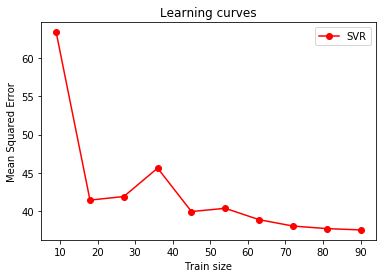

In [49]:
svr = SVR(kernel='rbf', C=100, gamma=0.1, degree=2)
train_sizes, train_scores_svr, test_scores_svr = \
    learning_curve(svr, X[:100], Y[:100], train_sizes=np.linspace(0.1, 1, 10),
                   scoring="neg_mean_squared_error", cv=10)
print (test_scores_svr.shape)
plt.plot(train_sizes, -test_scores_svr.mean(1), 'o-', color="r",
         label="SVR")
plt.xlabel("Train size")
plt.ylabel("Mean Squared Error")
plt.title('Learning curves')
plt.legend(loc="best")

plt.show()